# Interactive notebook for the scarab stats library
This jupyter notebook shows how to use the scarab stats library to obtain and graph statistics from scarab runs

## Required data
To use this library, you need to have run an experiment using a json experiment file (found in the Scarab-infra repository). You will need a path to the experiment file used, the path to the files generated by the simulations (likely frontier_home/simpoint_flow/simulations), and the path to the traces used (likely /soe/hlitz/lab/traces on bohr3).

## Loading an experiment
To load an experiment from a json file, you need to import the stats library and create a stat agregator object to load the data. Then use its `load_experiment_json` method to load the file

In [234]:
from scarab_stats import stat_aggregator
import importlib
import scarab_stats
importlib.reload(scarab_stats)

# Create a stat aggregator object
aggregator = stat_aggregator()

# Paths to required data to load an experiment
TRACE_PATH = "/soe/hlitz/lab/traces/"
EXPERIMENT_PATH = "/soe/surim/frontier_home/frontier.json"
SIMULATION_PATH = "/soe/surim/frontier_home/simpoint_flow/simulations/"

# Load the experiment file at EXPERIMENT_PATH using the simulations created at SIMULATION_PATH by running scarab,
# using the traces located at TRACE_PATH
#experiment = aggregator.load_experiment_json(EXPERIMENT_PATH, SIMULATION_PATH, TRACE_PATH)

Alternatively, you can load an experiment from a CSV file directly. CSV representations can be saved using experiment.to_csv(path)

In [235]:
# Path for experiment to be saved to
SAVED_PATH = "/soe/surim/frontier_home/saved_experiment.csv"

# Save loaded experiment
#experiment.to_csv(SAVED_PATH)

# Load experiment from saved CSV
experiment = aggregator.load_experiment_csv(SAVED_PATH)

# Or equivalently:
#from scarab_stats import Experiment
#experiment = Experiment(SAVED_PATH)

## Visualizing data
First you may want to check what different statistics, configurations, or workloads are available for graphing. The stats library provides the following funcitons to do this

In [236]:
# Get the experiments stored in the experiment file (usually just one)
print("Experiments:", ", ".join(experiment.get_experiments()))

# Get the different configurations stored in the experiment file
print("Configurations:", ", ".join(experiment.get_configurations()))

# Get the workloads that were ran
print("Workloads:", ", ".join(experiment.get_workloads()))

# Get first 15 statistics stored in the file
print("Statistics:", ", ".join(experiment.get_stats()[:5]))

Experiments: explore_stats
Configurations: dcache_assoc_4, dcache_assoc_8, dcache_32K, dcache_48K, dcache_64K, dcache_16K, dcache_8K, dcache_assoc_12, dcache_80K
Workloads: MPC
Statistics: CORE_CUM_STREAM_LENGTH_20_total_pct, DRAM_NUM_REQS_17_IPRF_total_count, FETCH_TH_ADJUST__8_pct, FU_BUSY_12_count, BTB_UPDATE_BTB_HIT_JITTED_CF_CBR_total_pct


You can now use the experiment to create graphs to visualize the data. There are several graphing functions to plot statistics aggregated at different levels, and to plot stats by their relative proportions.

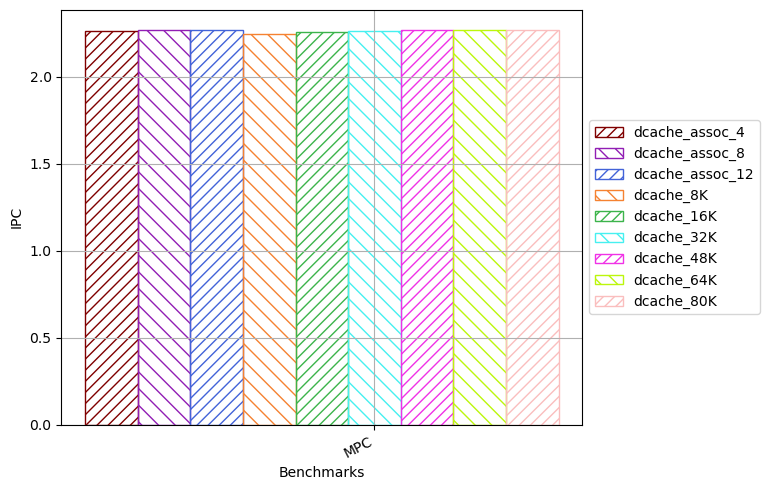

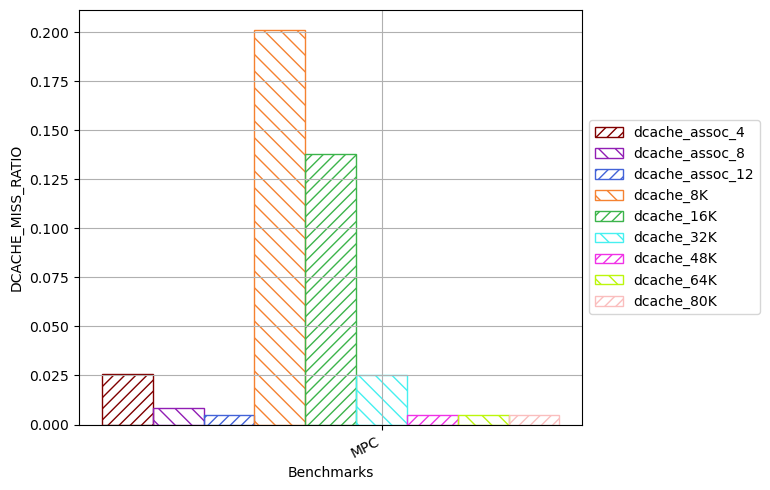

In [237]:
### This code cell creates a bare minimum graph to plot 

# Get the name of the experiment as a string, and select workloads and config(s) to plot
experiment_name = experiment.get_experiments()[0]
workloads_to_plot = ["MPC"]
configs_to_plot = ["dcache_assoc_4", "dcache_assoc_8", "dcache_assoc_12", "dcache_8K", "dcache_16K", "dcache_32K", "dcache_48K", "dcache_64K", "dcache_80K"]

# Statistics you want to plot
stats_to_plot = ['Periodic IPC']

# Call the plot function
aggregator.plot_workloads(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, title="", average=False, x_label="Benchmarks", y_label="IPC", bar_width=0.15)

# Statistics you want to plot
stats_to_plot = ['DCACHE_MISS_pct']

# Call the plot function
aggregator.plot_workloads(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, title="", average=False, x_label="Benchmarks", y_label="DCACHE_MISS_RATIO", bar_width=0.15)

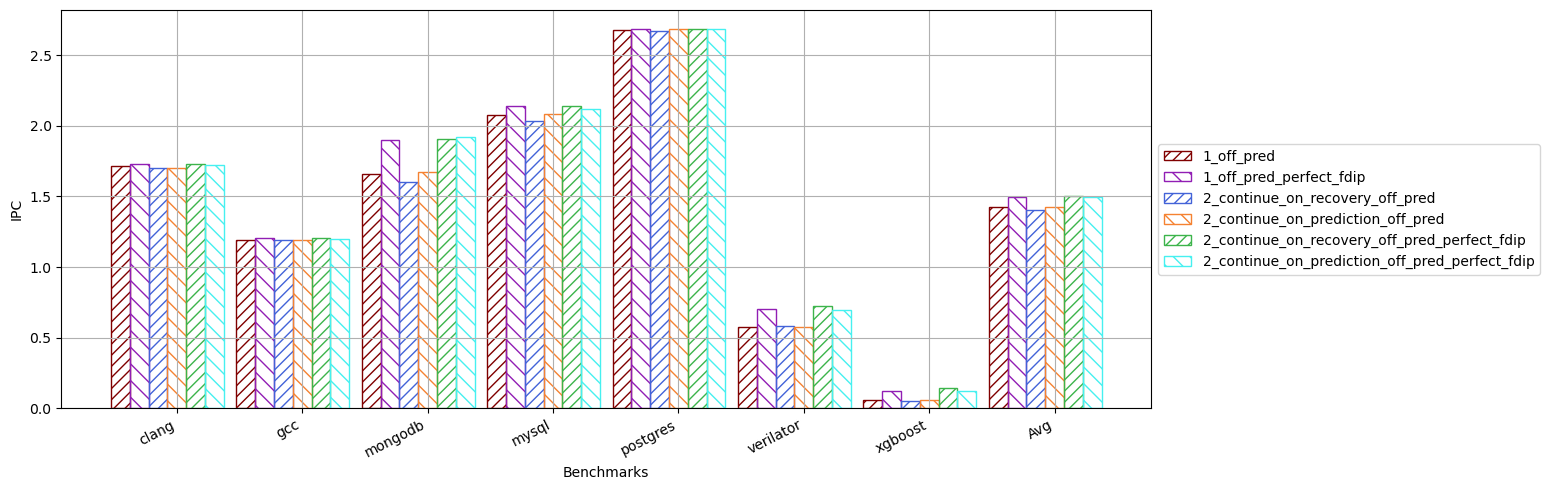

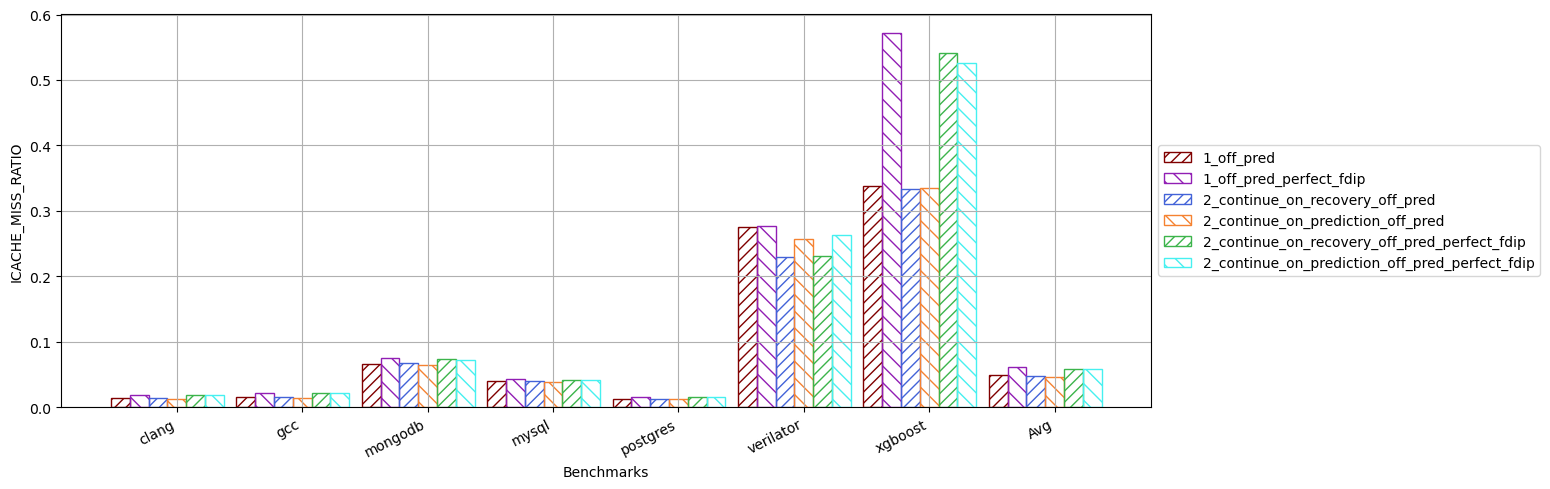

In [240]:
# Paths to required data to load an experiment
TRACE_PATH = "/soe/hlitz/lab/traces/"
EXPERIMENT_PATH = "/soe/surim/mp_home/test.json"
SIMULATION_PATH = "/soe/surim/mp_home/simpoint_flow/simulations/"

# Load the experiment file at EXPERIMENT_PATH using the simulations created at SIMULATION_PATH by running scarab,
# using the traces located at TRACE_PATH
#experiment = aggregator.load_experiment_json(EXPERIMENT_PATH, SIMULATION_PATH, TRACE_PATH)

# Path for experiment to be saved to
SAVED_PATH = "/soe/surim/mp_home/saved_experiment.csv"

# Save loaded experiment
#experiment.to_csv(SAVED_PATH)

# Load experiment from saved CSV
experiment = aggregator.load_experiment_csv(SAVED_PATH)

# Get the name of the experiment as a string, and select workloads and config(s) to plot
experiment_name = experiment.get_experiments()[0]
workloads_to_plot = ["clang", "gcc", "mongodb", "mysql", "postgres", "verilator", "xgboost"]
configs_to_plot = ["1_off_pred", "1_off_pred_perfect_fdip", "2_continue_on_recovery_off_pred", "2_continue_on_prediction_off_pred", "2_continue_on_recovery_off_pred_perfect_fdip", "2_continue_on_prediction_off_pred_perfect_fdip"]

# Statistics you want to plot
stats_to_plot = ['Periodic IPC']

# Call the plot function
aggregator.plot_workloads(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, title="", average=True, x_label="Benchmarks", y_label="IPC", bar_width=0.15)

stats_to_plot = ['ICACHE_MISS_pct']

# Call the plot function
aggregator.plot_workloads(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, title="", average=True, x_label="Benchmarks", y_label="ICACHE_MISS_RATIO", bar_width=0.15)

Plotting: ['FETCH_0_OPS_count', 'FETCH_1_OPS_count', 'FETCH_2_OPS_count', 'FETCH_3_OPS_count', 'FETCH_4_OPS_count', 'FETCH_5_OPS_count', 'FETCH_6_OPS_count', 'FETCH_7_OPS_count', 'FETCH_8_OPS_count', 'FETCH_9_OPS_count']


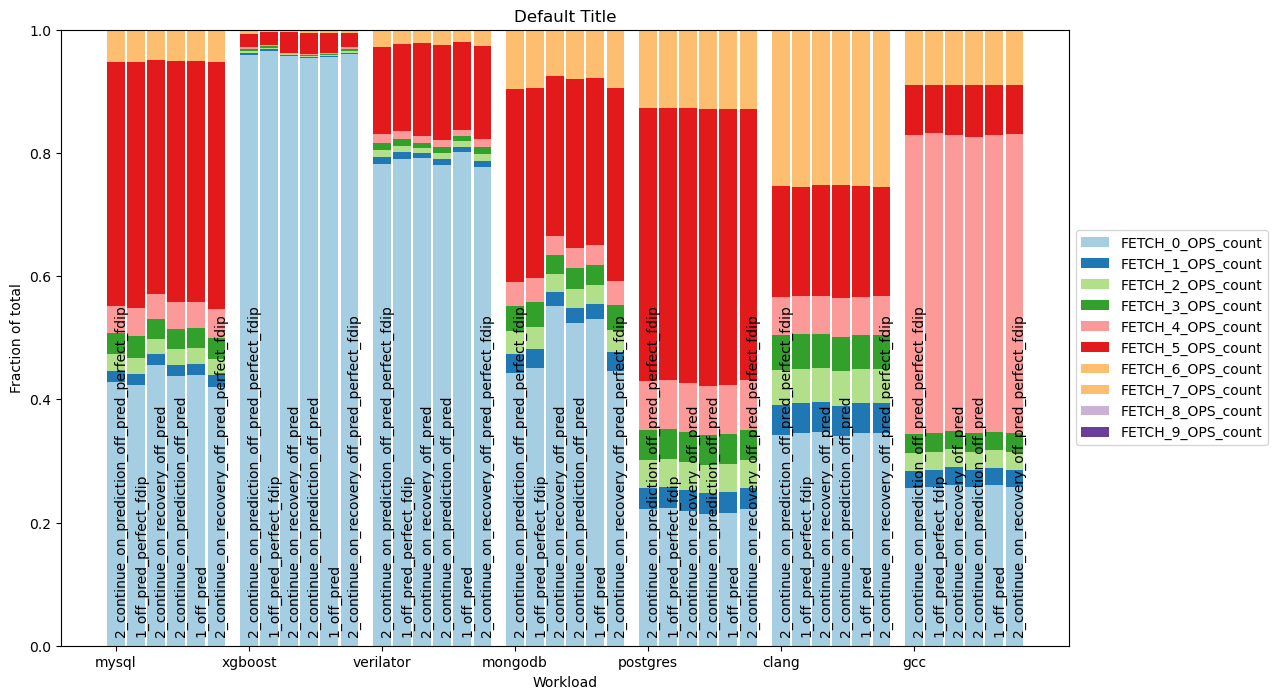

In [247]:
### This code cell plots the relative proportions for MAP_STAGE_RECEIVED_OPS_[0-8]_count

# Get desired statistics
stats_to_plot = [f"FETCH_{x}_OPS_count" for x in range(0,10)]
print("Plotting:", stats_to_plot)

# Print error if not in experiment
for stat in stats_to_plot:
    if not stat in experiment.get_stats():
        print(f"ERROR: Stat not in experiment: {stat}")
    
# Get the name of the experiment as a string, and all available workloads and configs to plot
experiment_name = experiment.get_experiments()[0]
workloads_to_plot = experiment.get_workloads()
configs_to_plot = experiment.get_configurations()

# Plot the stats from workloads/configs/experiment in a bar graph, as their proportion of sum of all stats_to_plot
# (like a pie chart, but in bar graph form)
aggregator.plot_stacked(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, label_method=1)

Plotting: ['MAP_STAGE_RECEIVED_OPS_0_count', 'MAP_STAGE_RECEIVED_OPS_1_count', 'MAP_STAGE_RECEIVED_OPS_2_count', 'MAP_STAGE_RECEIVED_OPS_3_count', 'MAP_STAGE_RECEIVED_OPS_4_count', 'MAP_STAGE_RECEIVED_OPS_5_count', 'MAP_STAGE_RECEIVED_OPS_6_count', 'MAP_STAGE_RECEIVED_OPS_7_count', 'MAP_STAGE_RECEIVED_OPS_8_count']


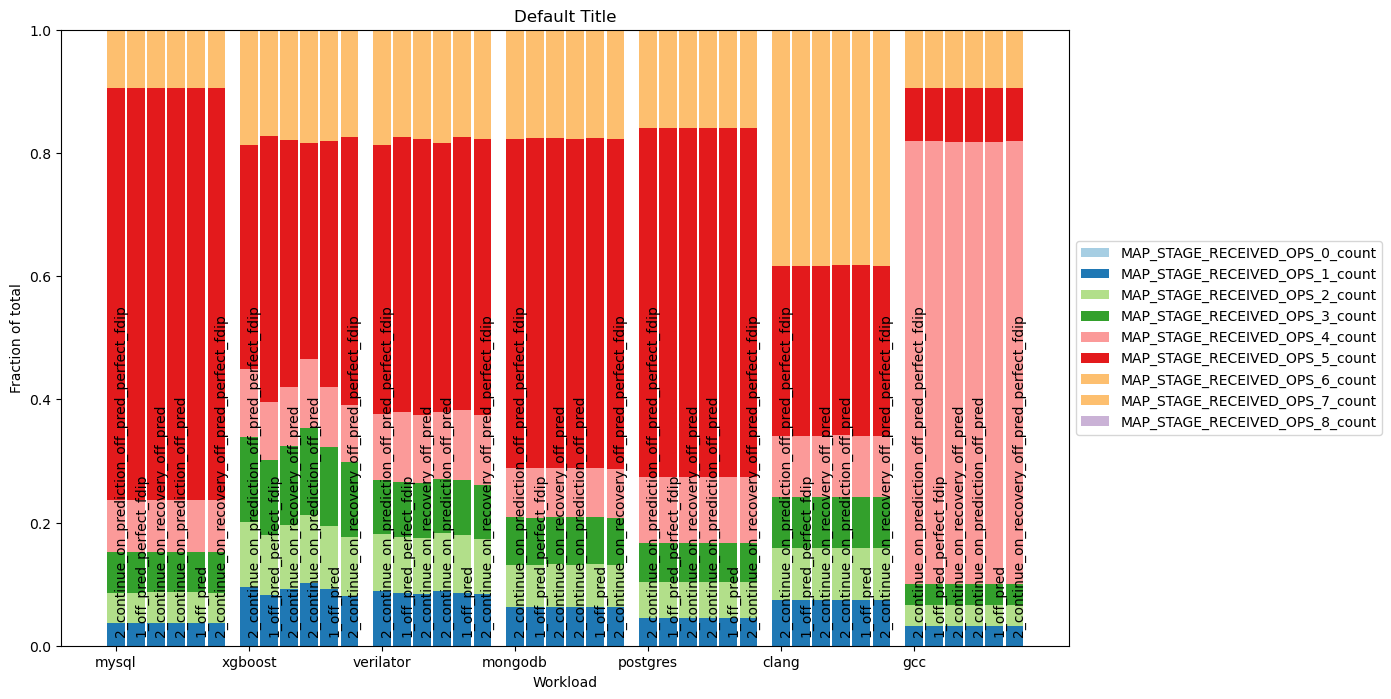

In [249]:
### This code cell plots the relative proportions for MAP_STAGE_RECEIVED_OPS_[0-8]_count

# Get desired statistics
stats_to_plot = [f"MAP_STAGE_RECEIVED_OPS_{x}_count" for x in range(0,9)]
print("Plotting:", stats_to_plot)

# Print error if not in experiment
for stat in stats_to_plot:
    if not stat in experiment.get_stats():
        print(f"ERROR: Stat not in experiment: {stat}")
    
# Get the name of the experiment as a string, and all available workloads and configs to plot
experiment_name = experiment.get_experiments()[0]
workloads_to_plot = experiment.get_workloads()
configs_to_plot = experiment.get_configurations()

# Plot the stats from workloads/configs/experiment in a bar graph, as their proportion of sum of all stats_to_plot
# (like a pie chart, but in bar graph form)
aggregator.plot_stacked(experiment, stats_to_plot, workloads_to_plot, configs_to_plot, label_method=1)

## Derived stats
You can create your own stats using parenthesis, addition, subtraction, multiplication, and division of columns and scalars. To use variables, you can use a format string to inject the values of variables as scalars. Equations are written with similar format to the following: `new_stat_name = stat_name_1 + stat_name_2` 

#

Equation: MAP_STAGE_REVIEVED_OPS_ALL_COUNT = MAP_STAGE_RECEIVED_OPS_0_count + MAP_STAGE_RECEIVED_OPS_1_count + MAP_STAGE_RECEIVED_OPS_2_count + MAP_STAGE_RECEIVED_OPS_3_count + MAP_STAGE_RECEIVED_OPS_4_count + MAP_STAGE_RECEIVED_OPS_5_count + MAP_STAGE_RECEIVED_OPS_6_count + MAP_STAGE_RECEIVED_OPS_7_count + MAP_STAGE_RECEIVED_OPS_8_count
Stat does exist
MAP_STAGE_REVIEVED_OPS_ALL_COUNT True
INFO: Overwriting value(s) of stat 'MAP_STAGE_REVIEVED_OPS_ALL_COUNT'
Stat does exist
WARN: This API is for only one stats.
INFO: Only plot the first stat, ignoring the rest from the provided list


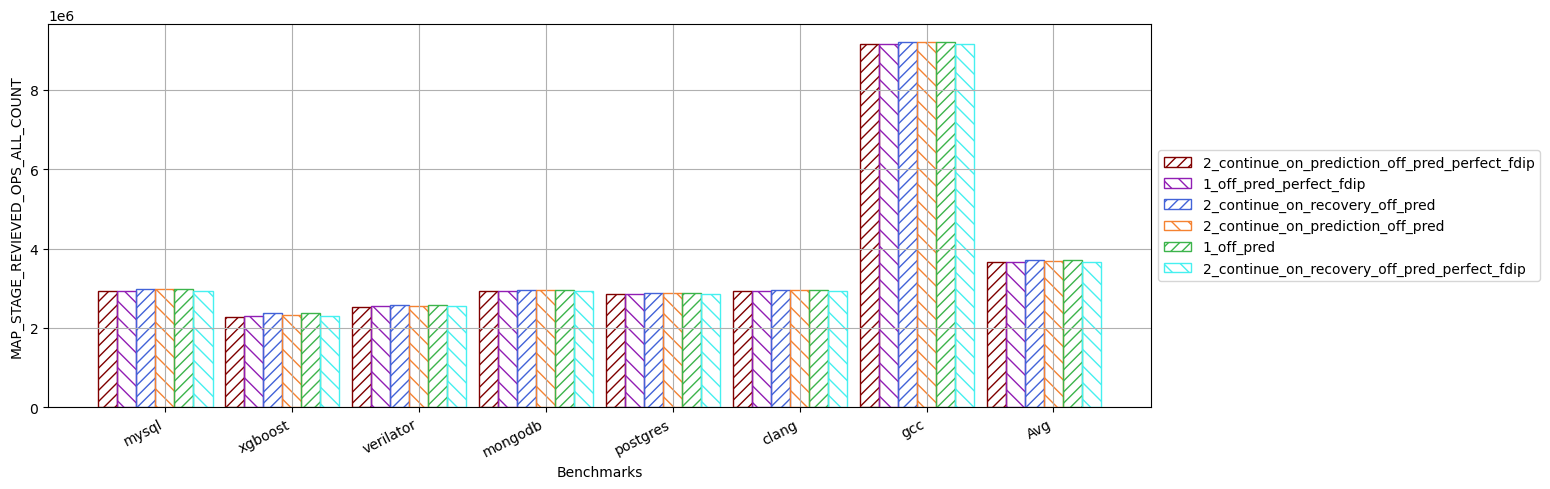

In [254]:
### This code cell creates a derived stat that is the sum of all the stats plotted in the previous plot

# Create equation that sums all of the stats
equation = f"MAP_STAGE_REVIEVED_OPS_ALL_COUNT = {' + '.join(stats_to_plot)}"
print("Equation:", equation)

# Print if it exists
stat_exists = "MAP_STAGE_REVIEVED_OPS_ALL_COUNT" in experiment.get_stats()
print(f"Stat does {'' if stat_exists else 'not '}exist")

# Add stat as new entry
experiment.derive_stat(equation)

# Print if it exists now
stat_exists = "MAP_STAGE_REVIEVED_OPS_ALL_COUNT" in experiment.get_stats()
print(f"Stat does {'' if stat_exists else 'not '}exist")

# Plot previous stats and new derived stats. To plot only derived stat, remove stats_to_plot
new_stats_to_plot = stats_to_plot + ["MAP_STAGE_REVIEVED_OPS_ALL_COUNT"]
aggregator.plot_workloads(experiment, new_stats_to_plot, workloads_to_plot, configs_to_plot, title="", average=True, x_label="Benchmarks", y_label="MAP_STAGE_REVIEVED_OPS_ALL_COUNT", bar_width=0.15)